<a href="https://colab.research.google.com/github/kishan-pithadiya/Data-Science-Business-Analytics-Internship-at-The-Sparks-Foundation/blob/main/Task_2_Prediction_using_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP : The Sparks Foundation** 

###**Data Science & Business Analytics Intern**

### **Author: Kishan Pithadiya**

### **Task - 2 Predicting using Unsupervised Machine Learning**



In this task we have iris dataset and we need to predict the optimum number of clusters and represent it visually

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

Mounted at /content/drive


### **Data Preprocessing**

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Show Rows and Columns
iris.shape

(150, 6)

In [ ]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Check for missing  and duplicate values
print(iris.isnull().sum(), '\n\nNumber of duplicate rows: ' , iris.duplicated().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
spec_code        0
dtype: int64 

Number of duplicate rows:  3


In [ ]:
# drop duplicate rows

iris.drop_duplicates(inplace=True)  

iris.shape[0]  # gives number of rows. Similarly, data.shape[1] will give number of columns

# now number of rows left 147, earlier there were 150 rows.

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


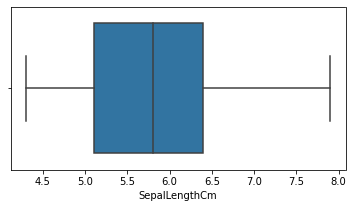

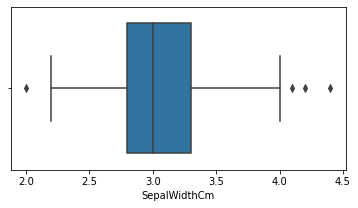

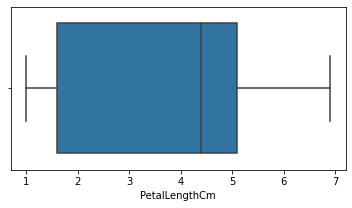

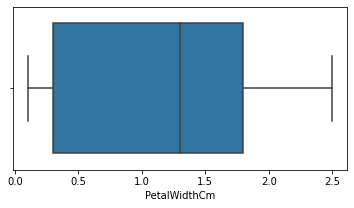

In [ ]:
# Check for any outliers in the numeric data
for i in iris.columns:
    if iris[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris[i])
        plt.show()

As we can see that SepalWidth column have some outliers.

In [ ]:
# Remove outliers present in the SepalWidthCm column using IQR(Inter Quartile Range) method

q1,q3 = np.percentile(iris['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
iris['SepalWidthCm'] = iris['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        

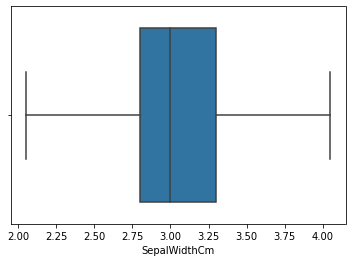

In [ ]:
sns.boxplot(iris['SepalWidthCm'])

As we can see from the above figure there is no outlier now.

In [ ]:
# dropping Id column
iris.drop('Id', axis=1, inplace=True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'spec_code'],
      dtype='object')

**Label Encoding for Species**

In [ ]:
spec_lb = LabelEncoder()
iris["spec_code"] = spec_lb.fit_transform(iris.Species)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spec_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
iris.spec_code.unique()

array([0, 1, 2])

### **Data Understanding**

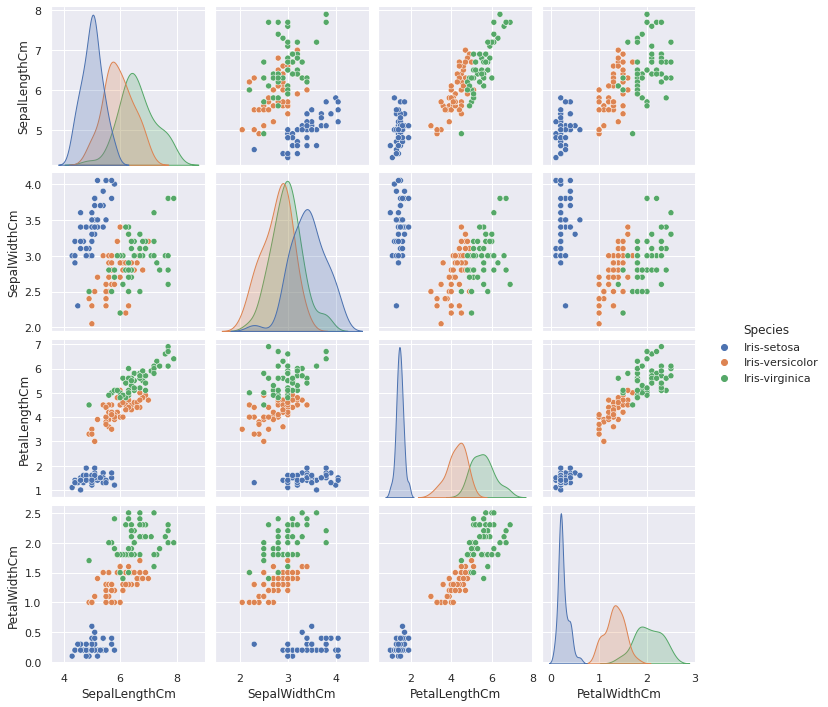

In [ ]:
# Distributions of features by Species
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")
plt.show()

As we can see from above figure We can not distinguish between the species based on Sepal Length/Width but we can clearly tell setosa apart from the other species based on Petal Length/Width

In [ ]:
# Correlation Matrix
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,spec_code
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058,0.782904
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139,-0.417918
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000,0.955693
spec_code,0.782904,-0.417918,0.948339,0.955693,1.000000


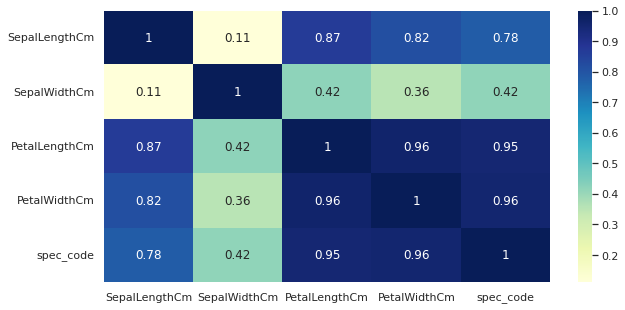

In [ ]:
# Visualize correlation using HeatMap
plt.figure(figsize=(10,5))
sns.heatmap(abs(iris.corr()), cmap='YlGnBu', annot=True)
plt.show()

### **K-means clustering**

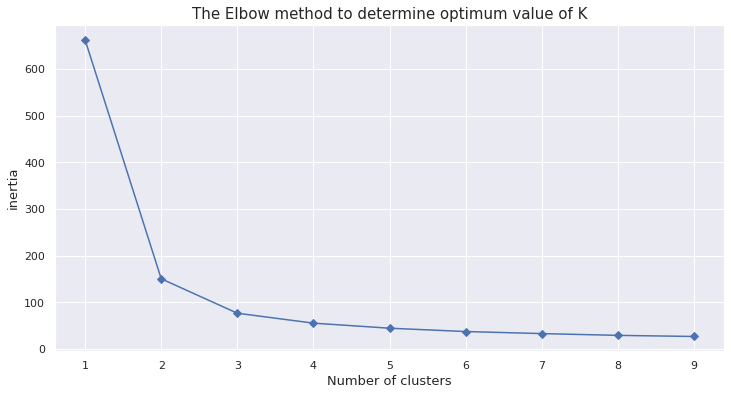

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Allowing us to observe 'The elbow'
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), wcss, marker='D')
plt.title('The Elbow method to determine optimum value of K', fontsize = "15")
plt.xlabel('Number of clusters', fontsize = "13")
plt.ylabel('inertia', fontsize = "13") 
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.



In [ ]:
# Applying kmeans to the dataset / Creating the k-means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

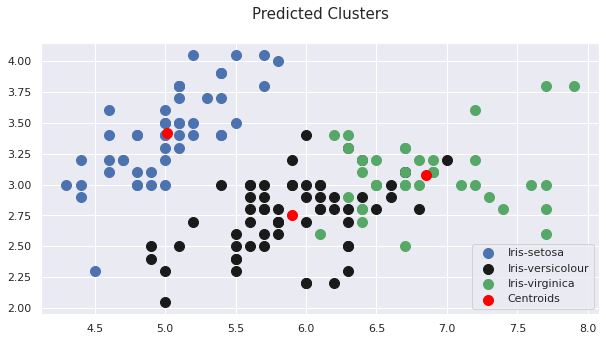

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'b', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'k', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'g', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.title('Predicted Clusters\n', fontsize = "15")
plt.legend()
plt.show()

From this we choose the number of clusters as **"3"**.